In [6]:
import pandas
import numpy as np 
import pandas as pd


In [7]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
cancer = pd.read_csv("/content/cancer_de_mama.csv",sep=";")



In [8]:
cancer= pd.DataFrame(cancer)

In [9]:
cancer.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# **Observación y preprocesamiento de datos**

In [48]:
#creamos una copia para empezar a limpiar los datos
ca= cancer.copy()

In [49]:
ca['Bare Nuclei'] = pd.to_numeric(ca['Bare Nuclei'], errors='coerce')


In [50]:
ca= pd.DataFrame(ca)

In [51]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [52]:
ca.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [53]:
# localizamos los valores null
null_columns= ca.columns[ca.isnull().any()]
ca[null_columns].isnull().sum()

Bare Nuclei    16
dtype: int64

In [54]:
ca= ca.dropna()

In [55]:
ca.describe(include = 'all')

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


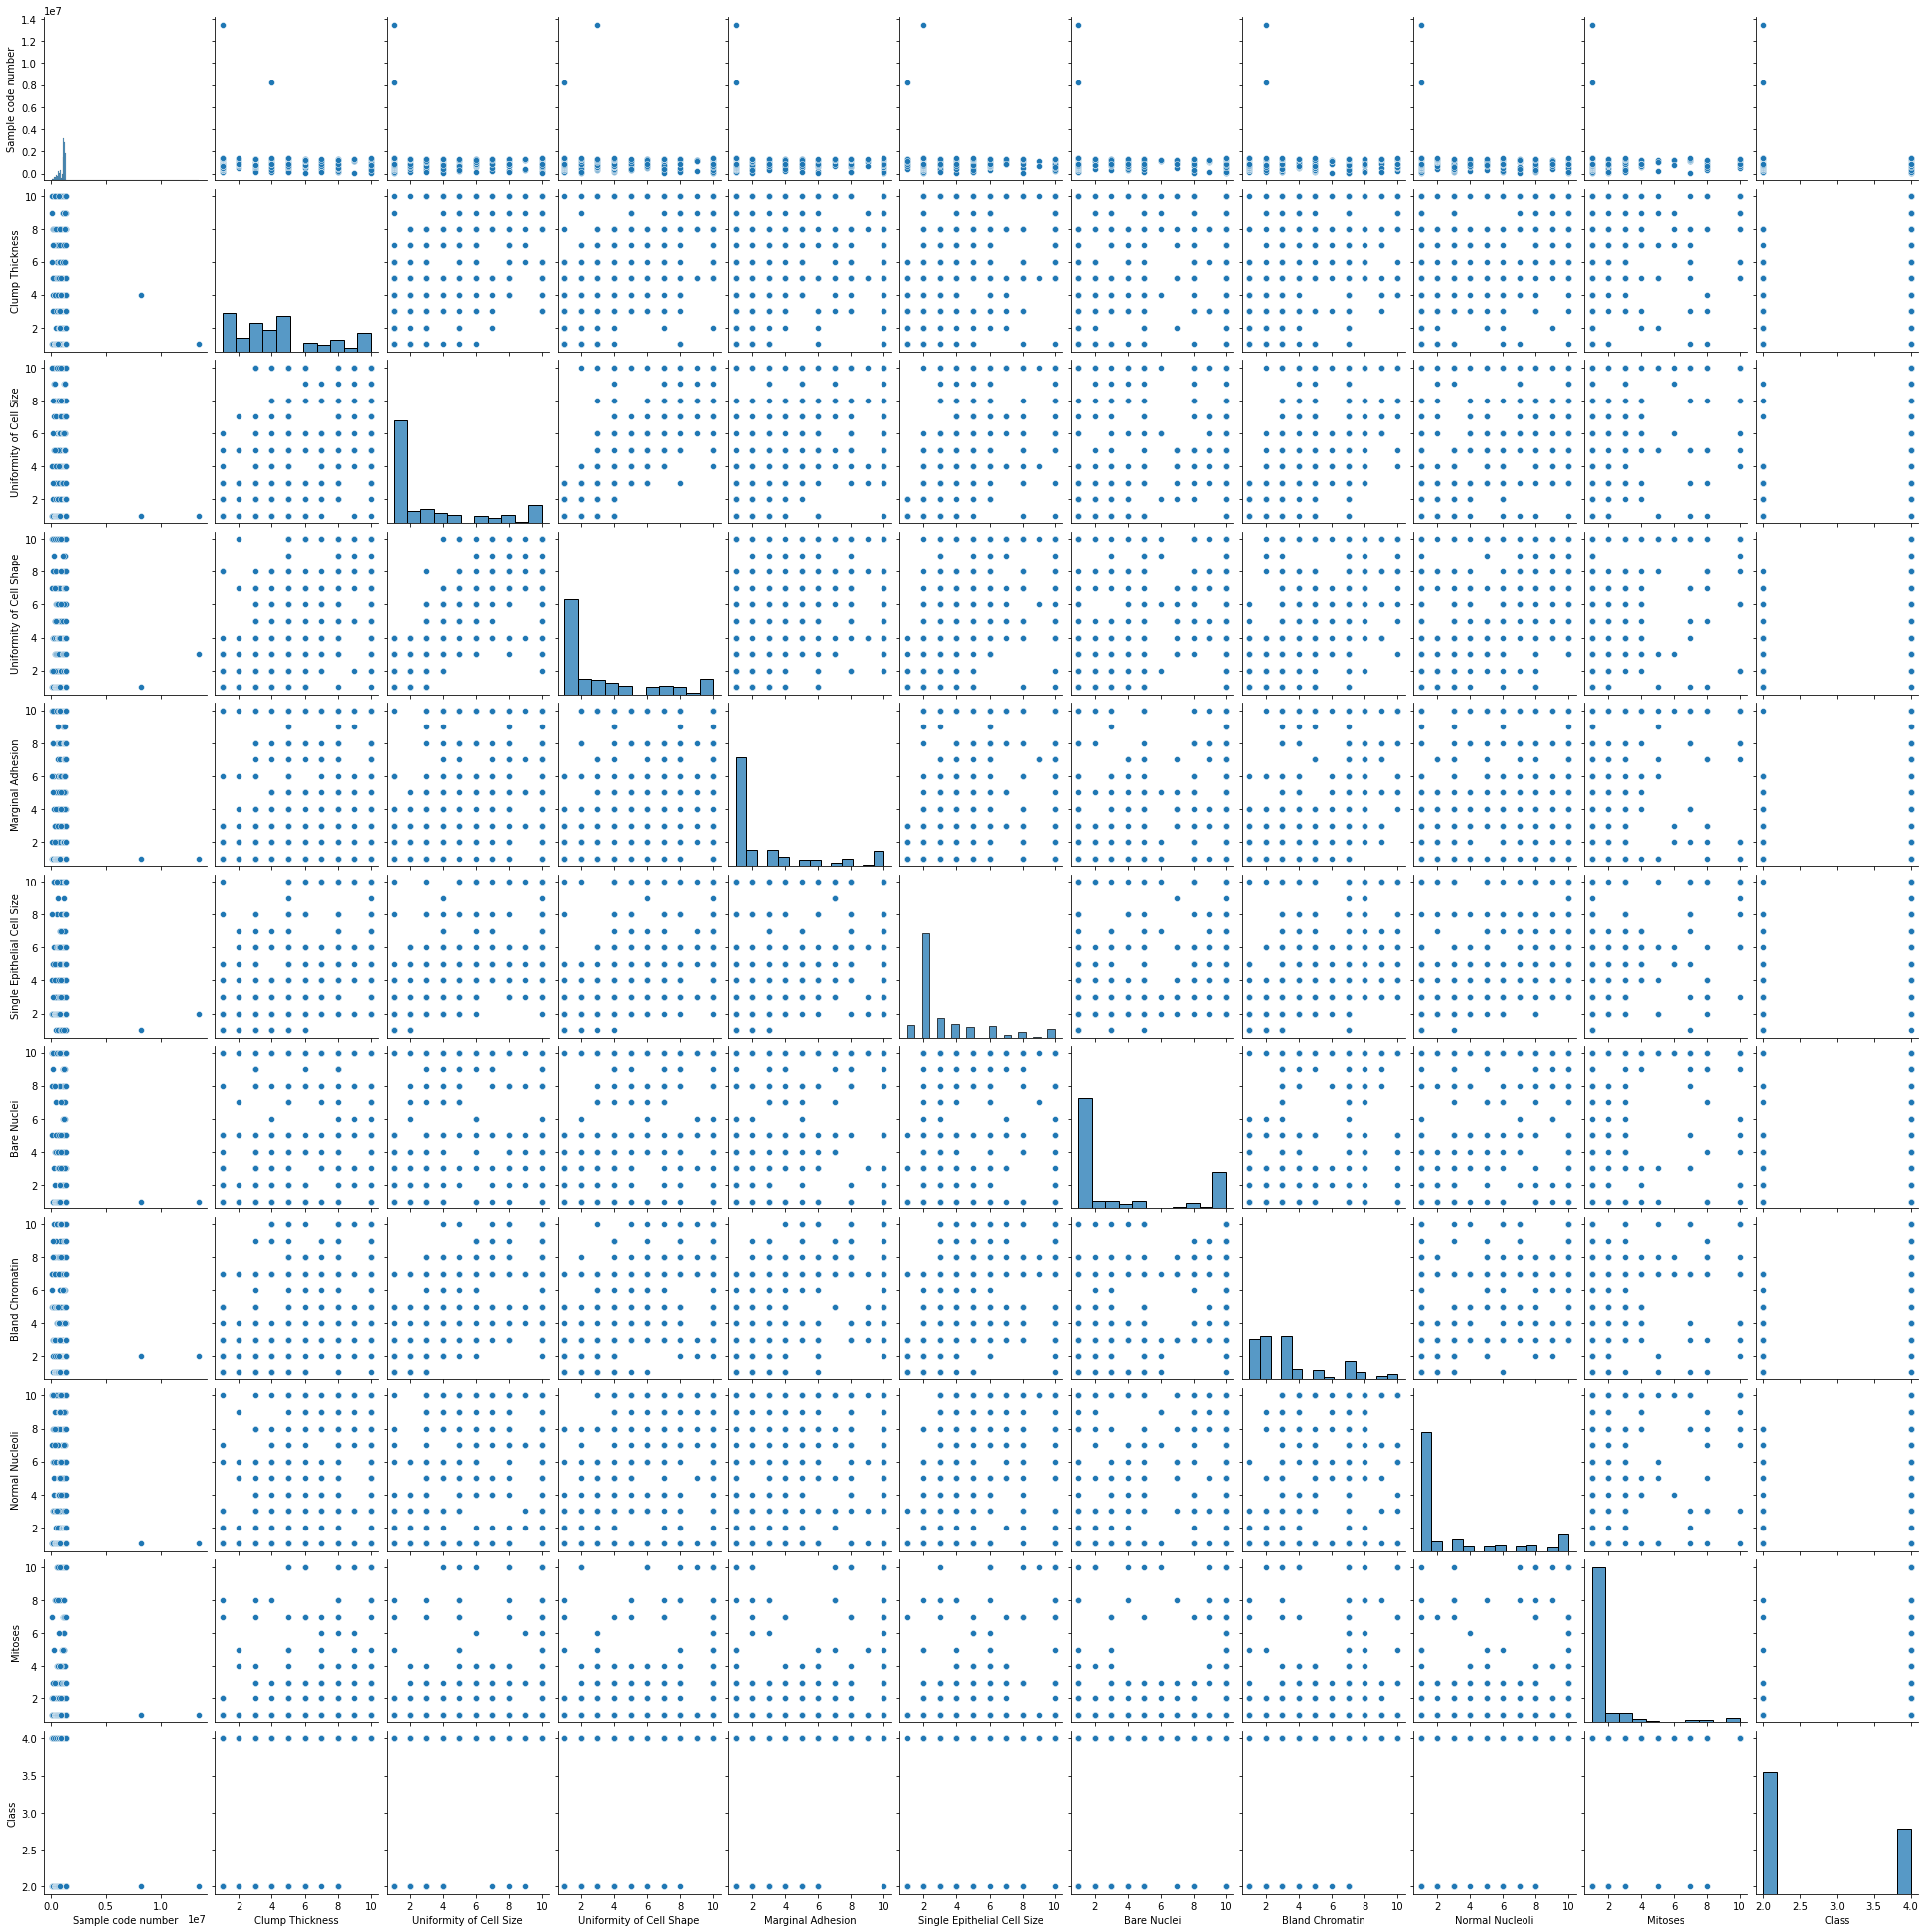

In [19]:
import seaborn as sns

sns.pairplot(ca)

<AxesSubplot:>

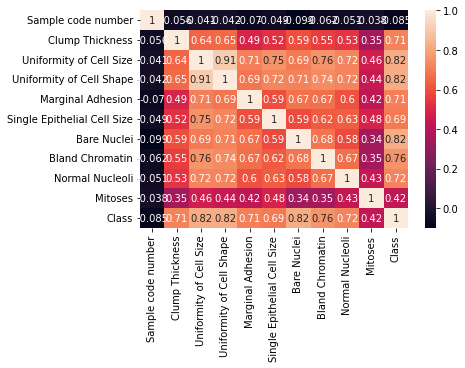

In [56]:
corr = ca.corr() 
sns.heatmap(corr, annot = True)

# **División de datos**

In [57]:
ca.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [58]:
X = ca[['Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape', 
        'Marginal Adhesion','Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses']]
y = ca['Class']


In [59]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [60]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2529)

#Shape of train test 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

In [62]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
420,3,2,2,3,2,3.0,3,1,1
674,1,1,1,1,2,1.0,2,1,1
215,8,7,8,7,5,5.0,5,10,2
192,5,1,1,1,2,1.0,2,1,1
590,4,10,8,5,4,1.0,10,1,1


# **Arbol de decisión**

In [63]:
ca=ca[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']]
ca

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [66]:
#importamos sklearn y creamos nuestras variables para el análisis

from sklearn.model_selection import train_test_split

X= ca.iloc[:,1:7]
y= ca['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Uniformity of Cell Size      683 non-null    int64  
 1   Uniformity of Cell Shape     683 non-null    int64  
 2   Marginal Adhesion            683 non-null    int64  
 3   Single Epithelial Cell Size  683 non-null    int64  
 4   Bare Nuclei                  683 non-null    float64
 5   Bland Chromatin              683 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 37.4 KB


In [70]:
X = X.astype(float)

In [71]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [72]:
# importamos la herramienta para desarrollar el árbol de decisión
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

In [73]:
#ejecutamos la predicción
predictions = clf.predict(X_test)
predictions

array([2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 4])

In [74]:
#importamos métricas importantes para interpretarlas
#accuray score nos permite conocer el valor porcentual de aciertos totales en este caso 95%

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9343065693430657

In [77]:
#precision score es el porcentaje de correctos positivos por cada clase, en este caso 96% de precision para 1
from sklearn.metrics import precision_score
precision_score(y_test, predictions, pos_label =2)

0.9767441860465116

In [79]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, pos_label = 4)

0.8627450980392157

In [80]:
features_names = X.columns
features_names

Index(['Uniformity of Cell Size', 'Uniformity of Cell Shape',
       'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
       'Bland Chromatin'],
      dtype='object')

In [81]:
clf.feature_importances_

array([0.82746575, 0.02718068, 0.0033646 , 0.        , 0.14098355,
       0.00100542])

In [82]:
features_dt = pd.DataFrame(clf.feature_importances_, index = features_names)
features_dt

,0
Uniformity of Cell Size,0.827466
Uniformity of Cell Shape,0.027181
Marginal Adhesion,0.003365
Single Epithelial Cell Size,0.000000
Bare Nuclei,0.140984
Bland Chromatin,0.001005


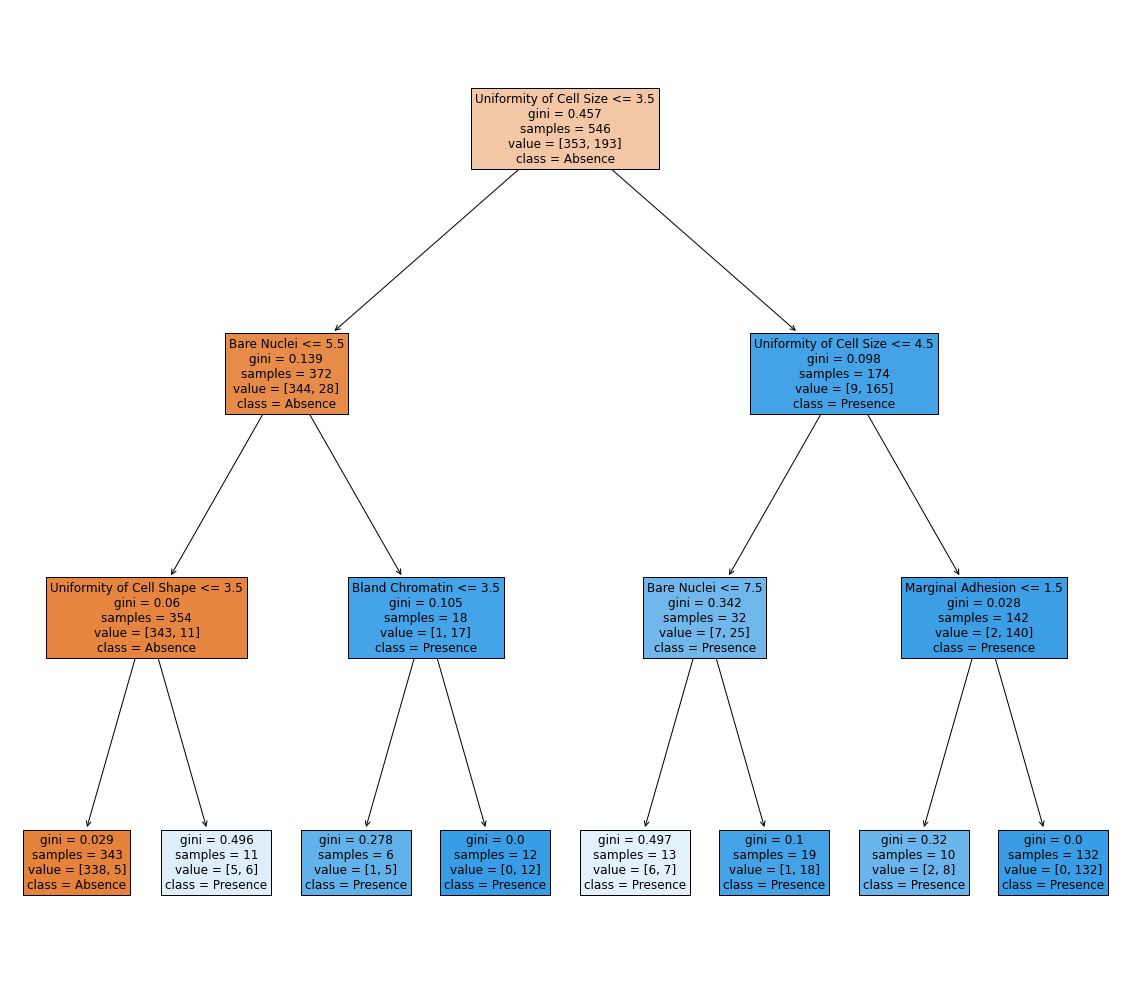

In [83]:
from sklearn import tree 
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,18)) 
_ = tree.plot_tree(clf,
               feature_names = features_names,
               class_names = {0:"Absence",1:"Presence"},
               filled = True,
               fontsize = 12)

# **KNN**

In [85]:
# Sin bucle plantilla basica
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import train_test_split

X = ca[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']]
y = ca['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


k = 5
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_train, y_train)
print(f"K={k}")
print(f"Error training: {(1 - model.score(X_train, y_train)) * 100} %")
print(f"Error test: {(1 - model.score(X_test, y_test)) * 100} %")
print("")

K=5
Error training: 2.092050209205021 %
Error test: 4.390243902439028 %



In [99]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (213) found smaller than n_clusters (239). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


In [100]:
y_resampled.value_counts()

2    239
4    239
Name: Class, dtype: int64

In [101]:
X_resampled.shape

(478, 9)

In [102]:
y_resampled.shape

(478,)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.3, random_state=42)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [114]:
def plot_confusion_matrix(X, y, model):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()

    plt.show()

In [115]:
# Sin bucle plantilla basica
def evaluate_model(X_train, y_train, X_test, y_test, model):
    print(f"Error training: {(1 - model.score(X_train, y_train)) * 100} %")
    print(f"Error test: {(1 - model.score(X_test, y_test)) * 100} %")
    print("")
    print("")
    print("")

    print("Training confusion matrix")
    plot_confusion_matrix(X_train, y_train, model)
    print("Test confusion matrix")
    plot_confusion_matrix(X_test, y_test, model)

Error training: 3.8922155688622784 %
Error test: 4.1666666666666625 %



Training confusion matrix


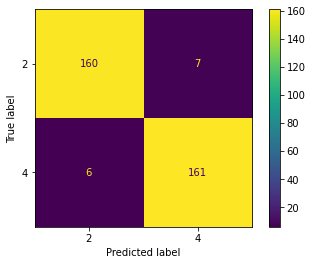

Test confusion matrix


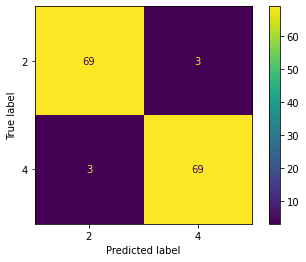

In [116]:
# KNN

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)

# **BOOSTING**

Error training: 2.6946107784431184 %
Error test: 3.472222222222221 %



Training confusion matrix


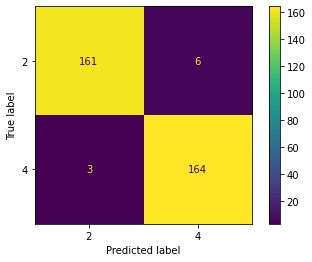

Test confusion matrix


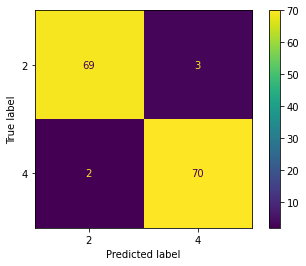

In [117]:
# Boosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2,
    max_depth=1, random_state=0)

model = model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)